# Proyecto 2
## David Henao Molina - Maria Camila Bravo

In [133]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import scipy.signal as signal 
from scipy.fftpack import fft
from scipy.signal import detrend
from scipy.fftpack import fft
from numpy.polynomial.polynomial import Polynomial

### Extracción de los datos


In [134]:
ruta_base = os.getcwd()
ruta_base

'/Users/mcamilabravo/Documents/Universidad 2024:2/Biosenales/Biosenales_20242'

In [135]:
#ruta = "c:\\Users\\User\\OneDrive - Universidad de Antioquia\\David\\2024 - 2\\Bioseñales\\lab\\Proyecto2\\Diagnostics.xlsx"
ruta = "/Users/mcamilabravo/Documents/Universidad 2024:2/Biosenales/Proyecto 2/Diagnostics.xlsx"
dataframe = pd.read_excel(ruta)
dataframe

,FileName,Rhythm,Beat,PatientAge,Gender,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
0,MUSE_20180113_171327_27000,AFIB,RBBB TWC,85,MALE,117,234,114,356,496,81,-27,19,208,265,386
1,MUSE_20180112_073319_29000,SB,TWC,59,FEMALE,52,52,92,432,401,76,42,8,215,261,431
2,MUSE_20180111_165520_97000,SA,NONE,20,FEMALE,67,67,82,382,403,88,20,11,224,265,415
3,MUSE_20180113_121940_44000,SB,NONE,66,MALE,53,53,96,456,427,34,3,9,219,267,447
4,MUSE_20180112_122850_57000,AF,STDD STTC,73,FEMALE,162,162,114,252,413,68,-40,26,228,285,354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10641,MUSE_20181222_204306_99000,SVT,NONE,80,FEMALE,196,73,168,284,513,258,244,32,177,261,319
10642,MUSE_20181222_204309_22000,SVT,NONE,81,FEMALE,162,81,162,294,482,110,-75,27,173,254,320
10643,MUSE_20181222_204310_31000,SVT,NONE,39,MALE,152,92,152,340,540,250,38,25,208,284,378
10644,MUSE_20181222_204312_58000,SVT,NONE,76,MALE,175,178,128,310,529,98,-83,29,205,269,360


#### Creamos el nuevo dataframe que va a contener solo los registros que correspondan a bradicardia sinusal (SB Sinus Bradycardia) y fibrilación auricular (AFIB Atrial Fibrillation)

In [136]:
df_filtrado= data[(data['Rhythm'] == 'SB') | (dataframe['Rhythm'] == 'AFIB')]
df_filtrado = df_filtrado.reset_index(drop=True)
df_filtrado

,FileName,Rhythm,Beat,PatientAge,Gender,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
0,MUSE_20180113_171327_27000,AFIB,RBBB TWC,85,MALE,117,234,114,356,496,81,-27,19,208,265,386
1,MUSE_20180112_073319_29000,SB,TWC,59,FEMALE,52,52,92,432,401,76,42,8,215,261,431
2,MUSE_20180113_121940_44000,SB,NONE,66,MALE,53,53,96,456,427,34,3,9,219,267,447
3,MUSE_20180112_120347_79000,SB,NONE,46,FEMALE,57,57,70,404,393,38,24,9,225,260,427
4,MUSE_20180114_075026_69000,AFIB,TWC,80,FEMALE,98,86,74,360,459,69,83,17,215,252,395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5664,MUSE_20180114_134724_10000,SB,LVHV,56,FEMALE,56,56,88,444,428,49,62,9,219,263,441
5665,MUSE_20180113_122544_20000,SB,NONE,38,FEMALE,56,56,88,434,418,69,54,10,218,262,435
5666,MUSE_20180114_074720_85000,SB,NONE,55,FEMALE,57,57,94,414,402,-4,1,10,212,259,419
5667,MUSE_20180115_131524_93000,AFIB,RBBB TWC,70,MALE,93,82,130,386,479,61,194,15,225,290,418


In [137]:
fs = 500 # frecuencia de muestre mencionada 
t = np.arange(0, df_filtrado.shape[0]/fs,1/fs) 
t.shape

(5669,)

#### Extracción de las señales de ECG de la derivación II

In [138]:
#datos = pd.read_csv('c:\\Users\\User\\OneDrive - Universidad de Antioquia\\David\\2024 - 2\\Bioseñales\\lab\\Proyecto2\\ECGDataDenoised\\MUSE_20180112_073319_29000.csv',delimiter=',',names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
ruta = '/Users/mcamilabravo/Documents/Universidad 2024:2/Biosenales/Proyecto 2/ECGDataDenoised/MUSE_20180111_155115_19000.csv'
datos = pd.read_csv(ruta, delimiter=',', names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
datos_interes = datos['II']
datos


,I,II,III,aVR,aVL,aVF,V1,V2,V3,V4,V5,V6
0,-165.33,-358.970,-121.710,270.250,-28.869,-231.16,448.39,636.52,618.45,-7.8987,-315.160,-570.84
1,-150.75,-336.810,-114.980,251.410,-23.883,-217.52,441.74,646.47,642.56,35.3890,-269.510,-532.21
2,-136.69,-315.560,-108.630,233.450,-19.126,-204.36,436.06,656.31,665.95,76.5720,-225.830,-495.39
3,-123.74,-296.230,-103.090,217.230,-14.815,-192.29,432.27,666.14,688.05,113.5100,-186.000,-461.84
4,-112.57,-279.750,-98.611,203.530,-11.213,-181.87,431.08,676.31,708.47,144.3000,-151.680,-432.56
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-190.32,52.396,170.760,74.543,-170.890,107.63,310.73,398.59,538.11,230.9700,87.684,-249.88
4996,-178.98,65.438,171.870,62.325,-165.650,114.41,302.32,398.80,541.18,245.2700,110.940,-226.42
4997,-171.04,74.181,172.080,53.876,-161.490,118.93,297.25,401.02,544.16,254.4800,129.340,-207.20
4998,-165.46,79.570,171.300,48.203,-157.840,121.64,293.97,403.86,546.18,259.5100,144.140,-190.64


In [139]:
folder_path = '/Users/mcamilabravo/Documents/Universidad 2024:2/Biosenales/Proyecto 2/ECGDataDenoised'
#folder_path = r'c:\\Users\\User\\OneDrive - Universidad de Antioquia\\David\\2024 - 2\\Bioseñales\\lab\\Proyecto2\\ECGDataDenoised'

# Diccionario para almacenar los datos de la derivación II por cada paciente
ecg_dict = {}

# Iterar sobre el FileName del dataframe filtrado
for filename in df_filtrado['FileName']:
    file_path = os.path.join(folder_path, filename + '.csv')
    
    if os.path.exists(file_path):
        datos = pd.read_csv(file_path, delimiter=',', names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
        derivacion_II = datos['II'].values # Cargamos solo la derivación II y lo llevamos a arreglos
        ecg_dict[filename] = derivacion_II
    else:
        print(f"El archivo {filename}.csv no se encontró.")
print('Datos almacenados en dicionario ecg_dict de derivacion II')

Datos almacenados en dicionario ecg_dict de derivacion II


# Formula 1 - Detrend Polinomico

##### La primera fórmula se centra en cuantificar la desviación entre la señal original de ECG y la señal después de haber sido eliminada su tendencia (detrended). En este contexto, la desviación, denotada como δ(n), se define como el promedio de las diferencias al cuadrado entre las amplitudes de la señal original x(0) y la señal sin tendencia x(n), a lo largo de todos los puntos de la señal (k).


In [140]:
def detrend(x, n):
    k = len(x)
    t = np.arange(k)
    poly_coeffs = np.polyfit(t, x, n)
    trend = np.polyval(poly_coeffs, t)
    xn = x - trend
    return xn




/var/folders/11/9sh1kxmj38570z2lx7xfscbc0000gn/T/ipykernel_9819/2468755074.py:4: RankWarning: Polyfit may be poorly conditioned
  poly_coeffs = np.polyfit(t, x, n)


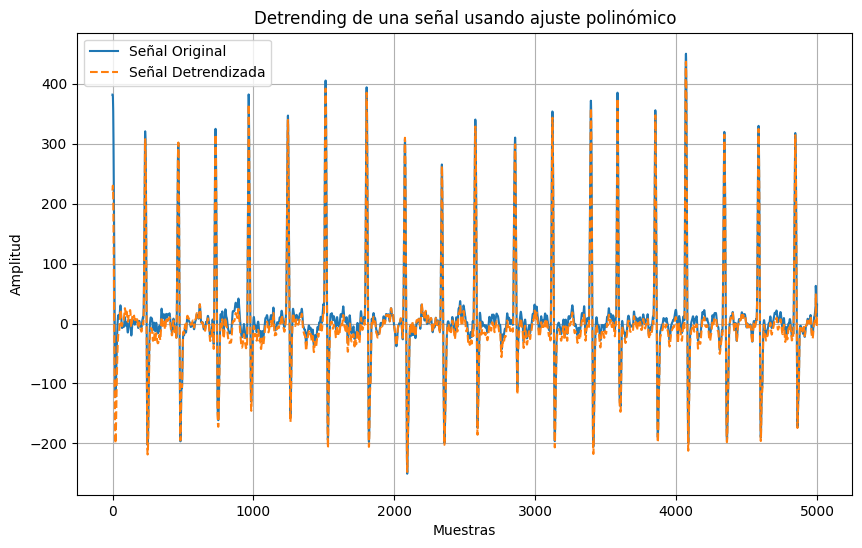

In [141]:
x = ecg_dict['MUSE_20180113_171327_27000']
n = 20# Elegir un grado para el polinomio

# Aplicar el detrend
xn = detrend(x, n)

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.plot(x, label='Señal Original')
#plt.plot(trend, label=f'Tendencia (grado {n})', linestyle='--')
plt.plot(xn, label='Señal Detrendizada', linestyle='--')
plt.legend()
plt.title('Detrending de una señal usando ajuste polinómico')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

# 2. Formula Compresión 

#### La fórmula es un proceso de normalización de la señal de ECG. La idea es ajustar todos los valores de la serie temporal de ECG, x(tk), a un rango entre 0 y 1, utilizando los valores máximo (xmax) y mínimo (xmin) de esa señal. Este ajuste se realiza para facilitar la comparación entre diferentes conjuntos de datos sin que se vean influenciados por la escala original de las señales.

In [142]:
def compression(c, Xmin, Xmax):
  return (c - Xmin) / (Xmax - Xmin)


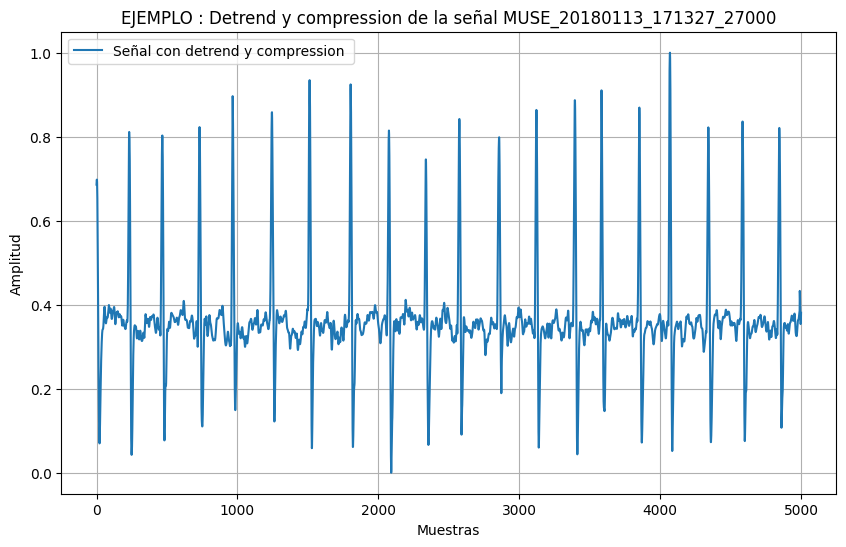

In [143]:
# definir los valores mínimos y máximos
Xmin = np.min(xn)
Xmax = np.max(xn)

s = compression(xn,Xmin,Xmax)
plt.figure(figsize=(10, 6))
plt.plot(s, label='Señal con detrend y compression ')
plt.legend()
plt.title('EJEMPLO : Detrend y compression de la señal MUSE_20180113_171327_27000')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

La señal comprimida tiene un offset, hay que aplicar nuevamete el drtrend

/var/folders/11/9sh1kxmj38570z2lx7xfscbc0000gn/T/ipykernel_9819/2468755074.py:4: RankWarning: Polyfit may be poorly conditioned
  poly_coeffs = np.polyfit(t, x, n)


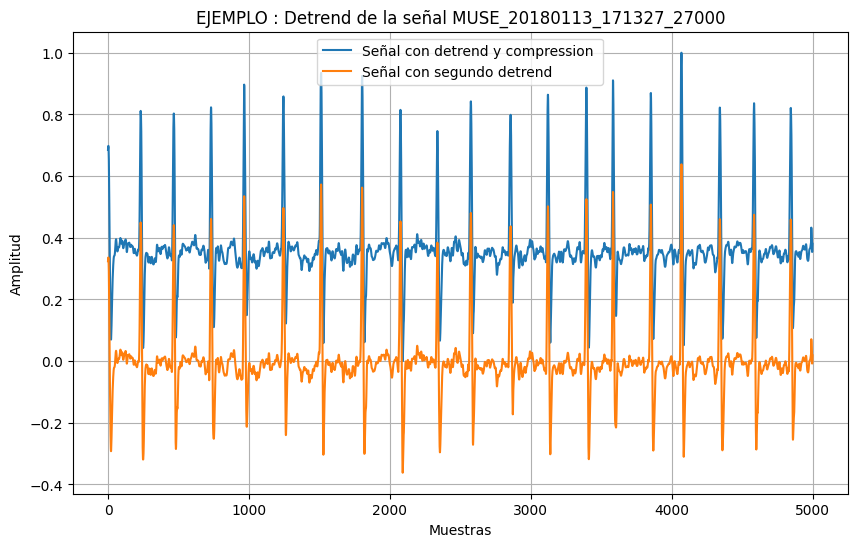

In [144]:
x_nuevo = detrend(s,20)
plt.figure(figsize=(10, 6))
plt.plot(s, label='Señal con detrend y compression ')
plt.plot(x_nuevo, label='Señal con segundo detrend')
plt.legend()
plt.title('EJEMPLO : Detrend de la señal MUSE_20180113_171327_27000')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

# 3. Formula Biespectro: Analisis Expectral de Potencia

#### Se Calcula a través de la Transformada Rápida de Fourier (FFT), el espectro de potencia de los datos se obtiene revelando que la mayor parte de la potencia se concentra en un rango de frecuencias se utiliza para medir la relación entre pares de frecuencias en una señal y evaluar cómo estas frecuencias interactúan entre sí.

In [148]:
def bispectrum(signal, n_segments=8):
    N = len(signal) // n_segments  # Tamaño de cada segmento
    bispec = np.zeros((N, N), dtype=complex)  # Matriz para almacenar el bispectrum
    
    # Dividir la señal en segmentos y aplicar FFT
    for i in range(n_segments):
        segment = signal[i*N:(i+1)*N]  # Tomar un segmento de la señal
        X = fft(segment)  # Aplicar FFT al segmento
        
        # Calcular el bispectrum
        for f1 in range(N):
            for f2 in range(N):
                if f1 + f2 < N:
                    bispec[f1, f2] += X[f1] * X[f2] * np.conj(X[f1 + f2])
                    
    return bispec



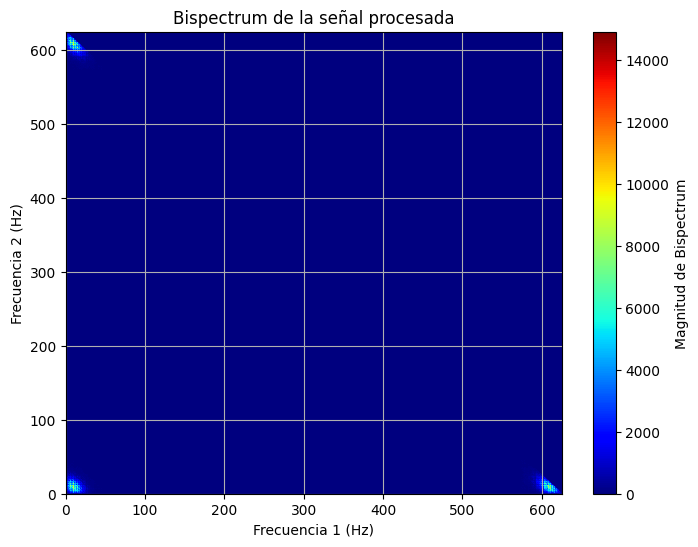

In [151]:
bispec_magnitude = np.abs(bispec)

# Graficar el bispectrum
plt.figure(figsize=(8, 6))
plt.imshow(bispec_magnitude, extent=[0, bispec.shape[0], 0, bispec.shape[1]], cmap='jet', aspect='auto', origin='lower')
plt.colorbar(label='Magnitud de Bispectrum')
plt.title('Bispectrum de la señal procesada')
plt.xlabel('Frecuencia 1 (Hz)')
plt.ylabel('Frecuencia 2 (Hz)')
plt.grid(True)
plt.show()

#### Fórmula 4: Cálculo de la bicoherencia

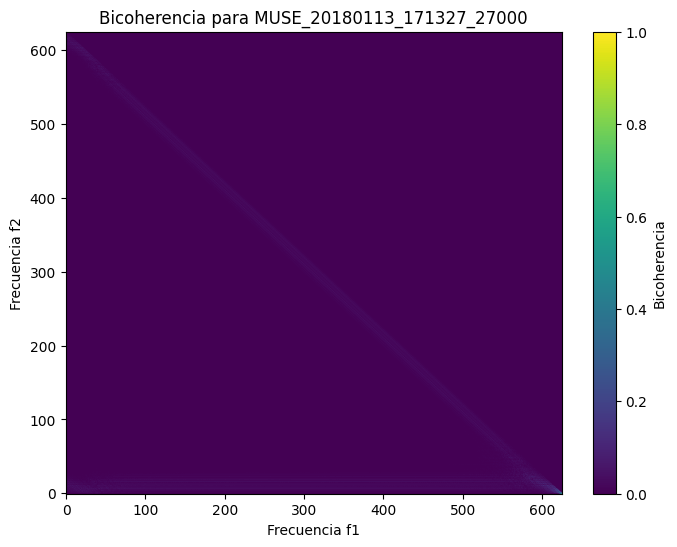

{'MUSE_20180113_171327_27000': array([[1.68621372e-03, 1.36040398e-03, 2.20760011e-03, ...,
        4.93372249e-01, 5.95482568e-01, 1.00000000e+00],
       [2.56553592e-03, 5.79092866e-03, 7.59377594e-04, ...,
        2.53313876e-01, 4.04517432e-01, 0.00000000e+00],
       [1.60764529e-02, 2.93236075e-03, 1.32196023e-02, ...,
        2.53313876e-01, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.07706854e-02, 2.93236075e-03, 7.59377594e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.60764529e-02, 5.79092866e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.56553592e-03, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])}


In [104]:
def bicoherence(bispec):
    numer = np.abs(bispec)
    denom = np.sum(np.abs(bispec), axis=0)
    denom[denom == 0] = 1e-10  # Evitar división por cero
    bicoherence_values = numer / denom
    return bicoherence_values

ecg_bicoherence_dict = {}

for idx, (filename, bispec) in enumerate(ecg_bispectrum_dict.items()):
    # Calcular la bicoherencia
    bicoh = bicoherence(bispec)
    ecg_bicoherence_dict[filename] = bicoh
    
    # Graficar solo el bispectrum de la primera señal
    if idx == 0:
        # Graficar la bicoherencia
        plt.figure(figsize=(8, 6))
        plt.imshow(bicoh, cmap='viridis', aspect='auto', origin='lower')
        plt.title(f'Bicoherencia para {filename}')
        plt.colorbar(label='Bicoherencia')
        plt.xlabel('Frecuencia f1')
        plt.ylabel('Frecuencia f2')
        plt.show()

        break  # Salir después de graficar el bispectrum y la bicoherencia de la primera señal

# Verificar los diccionarios con los resultados del bispectrum y bicoherencia
print(ecg_bicoherence_dict)



# 4. EXTRACCION DE FRECUENCIA QUE CONTIENE MAXIMA POTENCIA 

In [105]:
def extract_max_power_frequency(ecg_data_dict, fs=500):
    max_power_freq_dict = {}
    max_power_values = []
    
    for subject, ecg_data in ecg_data_dict.items():
        # Transformada de Fourier y cálculo de la potencia
        fft_data = np.fft.fft(ecg_data)
        freqs = np.fft.fftfreq(len(ecg_data), 1/fs)
        power_spectrum = np.abs(fft_data)**2
        
        # Extraer la frecuencia con máxima potencia
        idx_max_power = np.argmax(power_spectrum[:len(freqs)//2])  # Solo considerar las frecuencias positivas
        max_power_freq = freqs[idx_max_power]
        max_power = power_spectrum[idx_max_power]
        max_power_freq_dict[subject] = max_power_freq
        max_power_values.append(max_power)

    # Graficar las máximas potencias como una línea continua
    plt.figure(figsize=(12, 6))
    plt.plot(max_power_values, linewidth=2, color='b', label='Potencia máxima')
    plt.xlabel('Sujetos')
    plt.ylabel('Potencia máxima')
    plt.title('Potencia máxima en la frecuencia de mayor potencia')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    return max_power_freq_dict

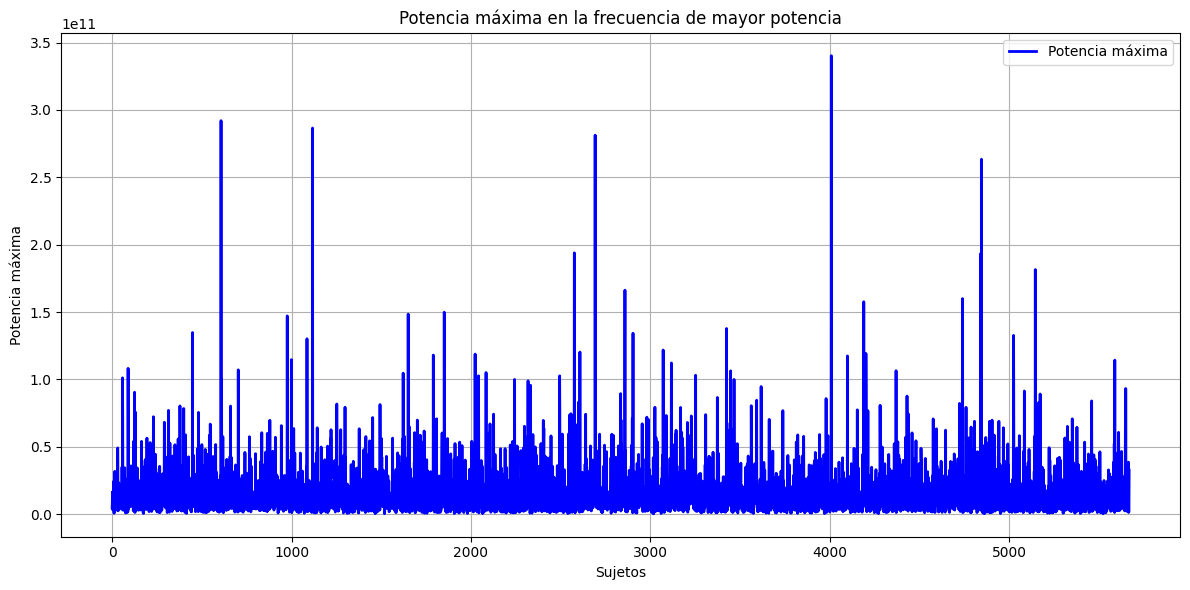

{'MUSE_20180113_171327_27000': np.float64(9.0),
 'MUSE_20180112_073319_29000': np.float64(2.6),
 'MUSE_20180113_121940_44000': np.float64(0.9),
 'MUSE_20180112_120347_79000': np.float64(3.8000000000000003),
 'MUSE_20180114_075026_69000': np.float64(4.2),
 'MUSE_20180114_075128_92000': np.float64(1.0),
 'MUSE_20180118_174026_42000': np.float64(2.9000000000000004),
 'MUSE_20180115_125443_25000': np.float64(3.7),
 'MUSE_20180113_134825_04000': np.float64(3.9000000000000004),
 'MUSE_20180114_070718_20000': np.float64(4.3),
 'MUSE_20180115_133559_70000': np.float64(1.0),
 'MUSE_20180113_133901_16000': np.float64(4.0),
 'MUSE_20180113_071734_35000': np.float64(2.8000000000000003),
 'MUSE_20180114_121218_64000': np.float64(2.9000000000000004),
 'MUSE_20180113_075301_94000': np.float64(5.9),
 'MUSE_20180114_122918_82000': np.float64(3.8000000000000003),
 'MUSE_20180118_135246_80000': np.float64(0.9),
 'MUSE_20180116_123940_90000': np.float64(9.700000000000001),
 'MUSE_20180118_132124_94000': n

In [115]:
extract_max_power_frequency(ecg_detrended_dict )